# 1 - Perkenalan

Nama: Imam Buchori Zarkasie

Batch: 019

Dataset: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Objectives:

*   Membuat model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing dengan dataset yang disediakan.





# 2 - Import Libraries

In [73]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
import pickle ,joblib
import json
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


# 3 - Data Loading

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!mkdir ~/.kaggle
!cp '/content/kaggle.json' ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 58% 26.0M/44.5M [00:00<00:00, 127MB/s] 
100% 44.5M/44.5M [00:00<00:00, 143MB/s]


In [9]:
!unzip -q /content/uber-and-lyft-dataset-boston-ma.zip -d datasetP1GC1

In [11]:
df = pd.read_csv('/content/datasetP1GC1/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [12]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:
# Duplicate Dataset

df_duplicate = df.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terdapat 693071 baris data dan 57 kolom.

In [15]:
#Mengecek missing value keseluruhan pada dataset
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Ditemukan 55095 data yang hilang pada fitur "price"

In [16]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Eksplorasi data dilakukan dengan melihat persebaran price pada dataset dan juga ingin melihat proporsi antara hour dan distance.

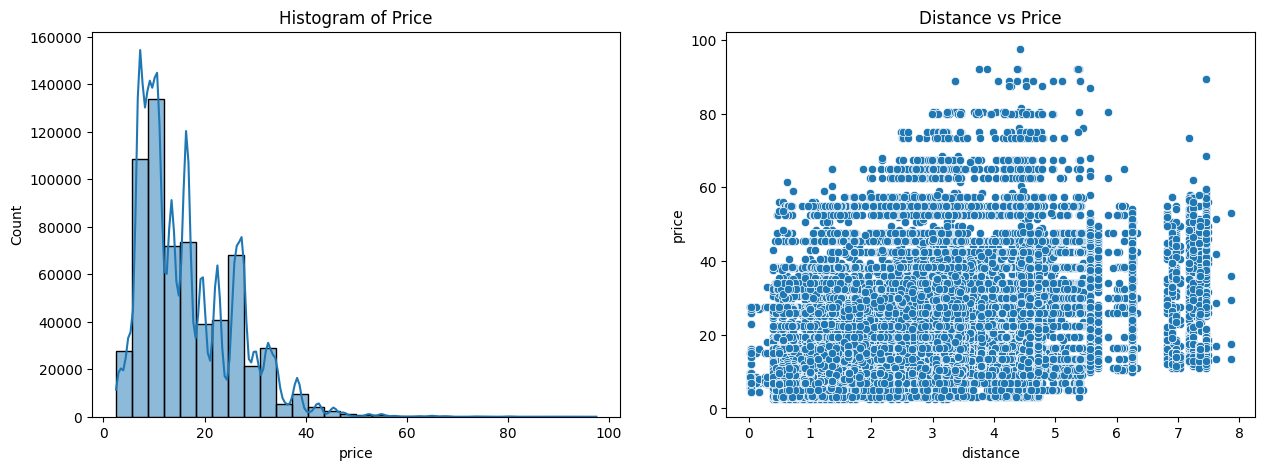

In [17]:
#Membuat plot histogram price dan scatter plot untuk dibandingkan
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='price', data=df)
plt.title('Distance vs Price')
plt.show()

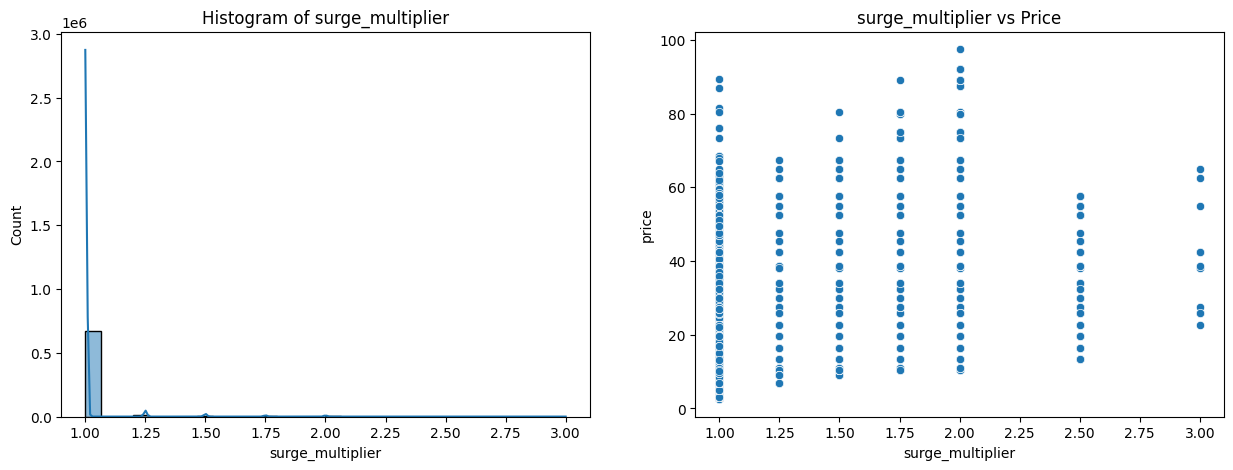

In [18]:
#Melihat sebaran nilai surge_multiplier
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['surge_multiplier'], kde=True, bins=30)
plt.title('Histogram of surge_multiplier')

plt.subplot(1, 2, 2)
sns.scatterplot(x='surge_multiplier', y='price', data=df)
plt.title('surge_multiplier vs Price')
plt.show()

> Ditemukan bahwa fitur 'price' **tidak menyebar normal** dan memiliki pola distribusi **miring ke kanan** berdasarkan Skewness Value > 1 dan Plot distribusinya. Maka dari itu bisa diputuskan untuk mengisi missing value dengan nilai median.

> Proporsi antara Price vs Distance tidak selalu linear, hal ini mungkin disebabkan adanya fitur "surge_multiplier" yaitu nilai pengali untuk fitur "price" yang berfluktuasi tergantung kepadatan pemesanan taxi.

# 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test dan proses-proses lain yang dibutuhkan.

## Handling Missing Values

Data yang memiliki missing value dihapus barisnya dari dataset.

In [20]:
#Menghapus missing value
df = df.dropna()

In [21]:
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

Sudah tidak ditemukan missing value.

## Handling Outlier

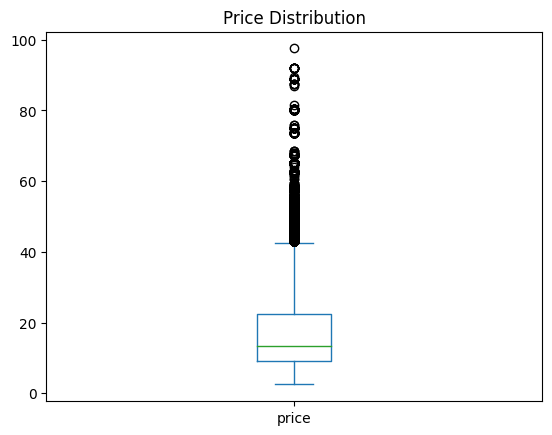

In [23]:
#Mengecek outlier pada fitur price
df['price'].plot(kind='box', title='Price Distribution');

In [24]:
#Menentukan nilai Quartil 1 dan 3
q1= df['price'].quantile(0.25)
q3= df['price'].quantile(0.75)
q1,q3

(9.0, 22.5)

In [25]:
#Menentukan nilai Inter Quartile range
IQR= q3-q1
IQR

13.5

In [26]:
#Membuat nilai limit untuk outlier
upper_limit= q3 + 1.5*IQR
lower_limit=q1 - 1.5*IQR

print(upper_limit)
print(lower_limit)

42.75
-11.25


In [27]:
#Melihat jumlah nilai Outlier
data_outlier= df[(df['price'] > upper_limit) | (df['price'] < lower_limit)]
data_outlier.shape[0]

5589

Data price yang dianggap outlier terdapat sebanyak 7982 dari total keseluruhan data yaitu 693071 baris atau sebanyak 1.1% relatif sedikit dari keseluruhan dataset.

Maka dari itu, ditentukan penanganan outlier dengan metode trimming untuk menghilangkan nilai outlier.

In [28]:
#Menunjukan jumlah df setelah outlier dihapus
df_no_outlier = df[~((df['price'] > upper_limit) | (df['price'] < lower_limit))]
df_no_outlier.shape

(632387, 57)

## Split between `X` (Features) and `y` (Target)

In [29]:
# Splitting between `X` and `y`

X = df_no_outlier.drop(['price'], axis=1)
y = df_no_outlier['price']
X

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Split between Train-Set and Test-Set

In [30]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (505909, 56)
Test Size  :  (126478, 56)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
316244,257a2da3-ca4f-40be-a503-75ecc307835a,1.543698e+09,21,1,12,2018-12-01 21:08:00,America/New_York,North Station,South Station,Lyft,...,0.0000,1543683600,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800
494918,5ed0c0b0-10bf-4083-af5b-07b9c09751f9,1.545102e+09,3,18,12,2018-12-18 03:05:11,America/New_York,Haymarket Square,Back Bay,Lyft,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
476565,49966fd5-fc2a-49a2-ae27-b92ac6e57bd2,1.543741e+09,8,2,12,2018-12-02 08:53:08,America/New_York,North Station,South Station,Uber,...,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
84861,7b099db3-bcae-40f4-ac31-0e0e80b7ab21,1.543633e+09,3,1,12,2018-12-01 03:03:06,America/New_York,North End,Financial District,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
553456,c836cb94-8f4e-411f-a7c5-8f73c1adcf86,1.544840e+09,2,15,12,2018-12-15 02:15:10,America/New_York,South Station,North Station,Uber,...,0.0000,1544806800,26.58,1544788800,46.97,1544814000,27.23,1544788800,44.24,1544817600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120839,290bda93-b8c7-4c04-8e11-722aa9d2471b,1.543279e+09,0,27,11,2018-11-27 00:30:14,America/New_York,Theatre District,Boston University,Uber,...,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
283949,76d9ea99-d31f-488f-b8a9-4ebd79c5f510,1.543641e+09,5,1,12,2018-12-01 05:08:00,America/New_York,Fenway,West End,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
400804,7351d458-fc56-47ed-bfd1-a97ccd1b7f6c,1.543638e+09,4,1,12,2018-12-01 04:13:03,America/New_York,Theatre District,Fenway,Lyft,...,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
144613,fcf86228-3944-4cef-ba25-6aa31130af4c,1.544989e+09,19,16,12,2018-12-16 19:35:05,America/New_York,Boston University,Theatre District,Uber,...,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800


## Feature Selection

Pada pemodelan ini dipilih fitur-fitur dengan tipe numerik karena memungkinkan memiliki korelasi linear dengan variabel target sehingga akan dilakukan seleksi fitur dengan ANOVA.

In [ ]:
#Mndefinisikan kolom dengan tipe numerik
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
num_columns

In [ ]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]
X_train_num

In [ ]:
# Pilih beberapa terbaik dengan uji ANOVA
selector = SelectKBest(score_func=f_regression, k='all') #k='all'

##fit_transform langsung lakukan seleksi dgn jumlah fitur k dan simpan ke X_train_anova
# X_train_anova = selector.fit_transform(X_train_new, y_train_drop)

#tanpa transform akan tampilkan semua
selector.fit(X_train_num, y_train)

# Buat DataFrame dengan nama kolom fitur
df_scores = pd.DataFrame({'Feature': X_train_num.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# Tampilkan DataFrame dengan fitur terurut berdasarkan skor ANOVA
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

Ditemukan dua fitur X yang memiliki korelasi yaitu distance dan surge multiplier.

In [55]:
#Memilih fitur yang mempunyai korelasi saja
X_train_selected = X_train_num[["distance", "surge_multiplier"]]
X_test_selected = X_test_num[["distance", "surge_multiplier"]]
X_test_selected.head()

,distance,surge_multiplier
260645,3.08,1.0
408541,1.30,1.0
224924,1.41,1.0
668377,1.16,1.0
634049,1.23,1.0


In [48]:
X_train_selected.describe()

,distance,surge_multiplier
count,505909.000000,505909.000000
mean,2.172044,1.012263
std,1.115901,0.083255
min,0.020000,1.000000
25%,1.270000,1.000000
50%,2.140000,1.000000
75%,2.900000,1.000000
max,7.860000,3.000000


## Feature Scaling

Karena data memiliki distribusi tidak normal maka perlu dilakukan scalling, teknik scalling yang cocok digunakan adalah MinMaxScaler.

In [53]:
#Menerapkan scaling dengan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_selected)

X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
X_test_scaled

array([[0.39030612, 0.        ],
       [0.16326531, 0.        ],
       [0.17729592, 0.        ],
       ...,
       [0.21428571, 0.        ],
       [0.16964286, 0.        ],
       [0.58163265, 0.        ]])

In [57]:
#Menyimpan nilai hasil scaling ke dataframe
selected_columns = ['distance', 'surge_multiplier']
df_train = pd.DataFrame(X_train_scaled, columns=selected_columns)
df_test = pd.DataFrame(X_test_scaled, columns=selected_columns)

In [58]:
df_test.describe()

,distance,surge_multiplier
count,126478.000000,126478.000000
mean,0.274600,0.006034
std,0.142702,0.041398
min,0.000000,0.000000
25%,0.159439,0.000000
50%,0.270408,0.000000
75%,0.367347,0.000000
max,1.000000,1.000000


Nilai pada dataset sudah discaling pada range 0-1

# 6 - Model Definition

In [59]:
# Training using Linear Regression

model_lin_reg = LinearRegression()

# 7 - Model Training

In [60]:
# Train the Model

model_lin_reg.fit(df_train, y_train)

LinearRegression()

In [61]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Slope     : ', model_lin_reg.coef_)

Intercept :  10.69086330668194
Slope     :  [19.58178089 29.32508487]


# 8 - Model Evaluation

In [62]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(df_train)
y_pred_test = model_lin_reg.predict(df_test)
y_pred_train

array([14.91193597, 15.63626205, 14.86198245, ..., 18.5085896 ,
       16.76021631, 17.6094262 ])

In [63]:
# Display `y_train`

y_train

316244     9.0
494918    16.5
476565     9.0
84861     27.5
553456    28.0
          ... 
120839    32.5
283949    32.5
400804    16.5
144613    10.5
133669    21.5
Name: price, Length: 505909, dtype: float64

In [64]:
# Model Evaluation using MAE

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  6.801448272451178
Error - Test Set  :  6.812266529909236


Hasil evaluasi nilai MAE pada Train Set dan Test set tergolong FIT, karena nilainya memiliki selisih tipis dan relatif kecil.

Sehingga model prediksi ini bisa dikatakan cukup akurat.

In [72]:
#Membuat dataframe perbandingan data price aktual dan prediksi
pred = pd.DataFrame({
    'actual':y_test,
    'pred':y_pred_test
})
pred.describe()

,actual,pred
count,126478.000000,126478.000000
mean,16.243485,16.244965
std,8.768199,3.055595
min,2.500000,10.690863
25%,9.000000,13.862912
50%,13.500000,16.110821
75%,22.500000,18.083985
max,42.500000,47.858651


Perbandingan nilai price hasil prediksi dengan price data aktual.

# 9 - Save Model

In [68]:
with open('model_lin_reg.pkl', 'wb') as file_1:
  pickle.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

# 10 - Inference

In [69]:
# Create New Data

data_inf = {
    'distance': 5,
    'surge_multiplier': 1
}

data_inf = pd.DataFrame([data_inf])
data_inf

,distance,surge_multiplier
0,5,1


In [70]:
# Feature Scaling and Feature Encoding

data_inf_scaled = scaler.transform(data_inf)
data_inf_scaled

array([[0.63520408, 0.        ]])

In [71]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_scaled)
y_pred_inf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.12929045])

Dari data input baru dengan distance=5 dan surge_multiplier=1 ditemukan hasil prediksi untuk nilai "price" sebesar 23.

# 11 - Kesimpulan

*   Hasil prediksi model regresi memiliki nilai  MAE pada Train Set dan Test set tergolong FIT, karena nilainya memiliki selisih tipis dan relatif kecil. Sehingga model prediksi ini sudah bisa dikatakan cukup akurat.
*   Selisih nilai hasil prediksi dengan aktual yang paling berbeda ada pada baris data paling minimum (MIN pada basic statistic) sehingga perlu ditelusuri lebih lanjut terkait data yang terecord tersebut.




# Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !


*   Hubungan Linear: Linear Regression mengasumsikan 
bahwa hubungan antara variabel independen dan dependen adalah linear. Ini berarti bahwa kenaikan atau penurunan nilai pada variabel independen akan menyebabkan kenaikan atau penurunan nilai pada variabel dependen dalam proporsi yang sama.
*   Independence: Linear Regression mengasumsikan bahwa setiap observasi dalam dataset adalah independen satu sama lain. Ini berarti bahwa nilai dari satu observasi tidak dipengaruhi oleh nilai dari observasi lain.
*   Tidak ada outlier: Linear Regression mengasumsikan bahwa tidak ada data yang memiliki nilai yang ekstrim atau jauh dari nilai yang diharapkan.

2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

> Intercept :  10.69086330668194
Slope     :  [19.58178089 29.32508487]

Dari nilai tersebut bisa ditafsirkan bahwa nilai minimum harga taksi di Boston tanpa adanya input pada fitur "distance" dan "surge multiplier" adalah sebesar 10.7 (Intercept)

Sedangkan jika input "distance" memiliki nilai maka dikalikan 19.6 lalu ditambah nilai "surge_multiplier"(Slope) yang dikalikan dengan 29.3, Maka didapatkan nilai prediksi untuk "price".
